<a href="https://colab.research.google.com/github/jemaldonado/Desafion-Neuron/blob/master/CLIMA%20SZEGED/CLIMA_SZEGED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np
np.random.seed(1234)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train =  pd.read_excel('https://github.com/jemaldonado/Desafion-Neuron/blob/master/CLIMA%20SZEGED/weather_szeged_train.xlsx?raw=true')
test = pd.read_excel('https://github.com/jemaldonado/Desafion-Neuron/blob/master/CLIMA%20SZEGED/weather_szeged_test.xlsx?raw=true')

In [ ]:
train.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.400000,19.400000,0.93,6.2790,14.7315,1018.23
1,4.950000,3.122222,1.00,7.8890,5.8926,1000.86
2,22.661111,22.661111,0.38,13.9426,16.0517,1022.64
3,17.044444,17.044444,0.81,12.9766,14.9569,1008.99
4,1.061111,-4.494444,0.56,24.7779,15.8263,1013.73


In [ ]:
test.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,17.294444,0.93,6.2468,14.9086,1022.12
1,-2.688889,0.84,4.5241,10.9480,1035.56
2,1.733333,0.96,3.9928,8.1788,1032.10
3,7.733333,0.93,3.2200,14.6349,1029.22
4,-3.983333,0.90,14.3934,4.0572,1018.44


In [ ]:
train.shape

(998, 6)

In [ ]:
test.shape

(538, 5)

In [ ]:
train.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000
mean,10.978084,9.908962,0.773317,10.299289,9.739774,999.05508
std,9.367005,10.594406,0.170484,6.747872,4.016944,139.47797
min,-14.022222,-19.961111,0.290000,0.000000,0.000000,0.00000
25%,2.800000,0.795833,0.670000,4.878300,7.973525,1012.91250
50%,11.622222,11.622222,0.810000,9.378250,9.982000,1017.47500
75%,17.908333,17.908333,0.920000,13.821850,11.270000,1022.61500
max,32.877778,33.566667,1.000000,45.933300,16.051700,1042.83000


In [ ]:
train.count()

Temperature (C)             998
Apparent Temperature (C)    998
Humidity                    998
Wind Speed (km/h)           998
Visibility (km)             998
Pressure (millibars)        998
dtype: int64

## Análise Exploratória dos dados

#### Qual a correlação entre as variáveis?

In [ ]:
df_corr_pearson = pd.DataFrame (train.corr(method ='pearson')['Temperature (C)'])
df_corr_pearson.sort_values('Temperature (C)',ascending=False)

,Temperature (C)
Temperature (C),1.000000
Apparent Temperature (C),0.992713
Visibility (km),0.393216
Wind Speed (km/h),0.007562
Pressure (millibars),-0.084675
Humidity,-0.546905


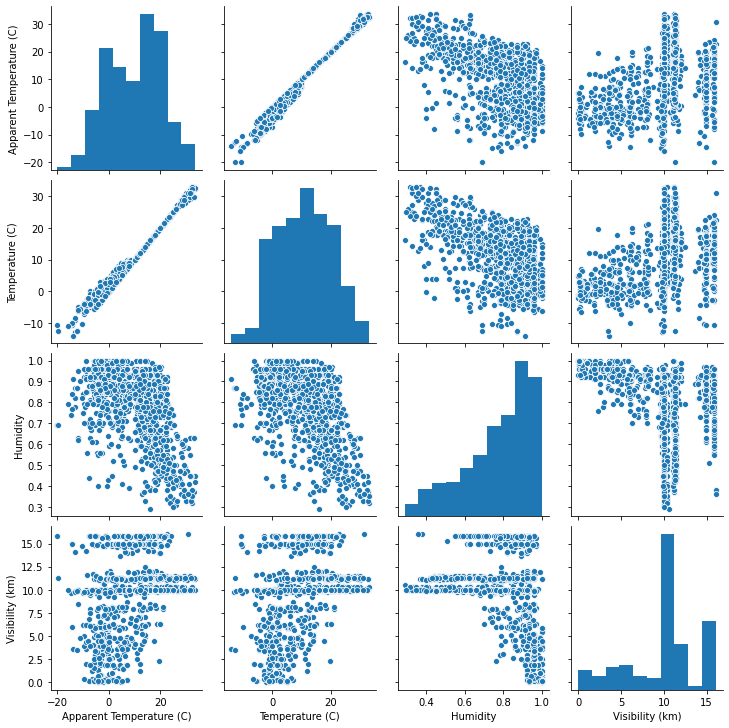

In [ ]:
sns.pairplot(train[['Apparent Temperature (C)','Temperature (C)', 'Humidity','Visibility (km)' ]])

Humidade pode estar relaciona fortemente a temperatura

# Seleção de variáveis

In [ ]:
df_corr_pearson = pd.DataFrame (train.corr(method ='pearson')['Temperature (C)'])
df_corr_pearson.sort_values('Temperature (C)',ascending=False)

,Temperature (C)
Temperature (C),1.000000
Apparent Temperature (C),0.992713
Visibility (km),0.393216
Wind Speed (km/h),0.007562
Pressure (millibars),-0.084675
Humidity,-0.546905


# Pre Processamento

In [ ]:
feat_train = train[['Apparent Temperature (C)','Visibility (km)','Humidity']]

In [ ]:
feat_train.head()

,Apparent Temperature (C),Visibility (km),Humidity
0,19.400000,14.7315,0.93
1,3.122222,5.8926,1.00
2,22.661111,16.0517,0.38
3,17.044444,14.9569,0.81
4,-4.494444,15.8263,0.56


# Criação do modelo

In [ ]:
#reg_ols = LinearRegression() 1.7
 
from sklearn.ensemble import RandomForestRegressor
reg_ols = RandomForestRegressor()

Divisão da base de treino

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(feat_train, train['Temperature (C)'], test_size=0.30, random_state=42)

Treinamento do modelo

In [ ]:
#treinando o model
reg_ols.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Salvando predições dos dados de validação

In [ ]:
#Coeficientes
#print("Coeficientes: {}".format(reg_ols.coef_))
#print("Intercept: {}".format(reg_ols.intercept_))
 
#salvando nossas predicoes
preds_ols_sklearn = reg_ols.predict(X_valid)

## Avaliando o modelo

### Resultado

In [ ]:
#Avaliando o modelo (R^2)
print("R2: {}".format(reg_ols.score(X_valid, y_valid)))
 
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_valid, preds_ols_sklearn)
 
print(mse)

R2: 0.9906311729645012
0.7709376386111098


### Analisando dados do resultado da predição dos dados de validação

In [ ]:
print(y_valid.shape)
print(preds_ols_sklearn.shape)
 
analise_resultado = pd.DataFrame()
analise_resultado['verdadeiro'] = y_valid 
analise_resultado['predito']    = preds_ols_sklearn
analise_resultado['diff']       = y_valid-preds_ols_sklearn
 
analise_resultado

(300,)
(300,)


,verdadeiro,predito,diff
453,12.733333,12.709333,0.024000
792,1.061111,0.217167,0.843944
209,8.861111,6.151056,2.710056
309,6.038889,7.815222,-1.776333
739,2.155556,2.105556,0.050000
...,...,...,...
314,15.072222,15.045111,0.027111
404,9.227778,9.146333,0.081444
7,19.105556,19.049500,0.056056
155,10.911111,10.819278,0.091833


Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [50, 2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,12],
}
CV_rfc = GridSearchCV(estimator=reg_ols, param_grid=param_grid, scoring = 'neg_mean_absolute_error', cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 2000}

In [ ]:
pd.DataFrame(CV_rfc.cv_results_)[['params','rank_test_score','mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'max_depth': 8, 'max_features': 'auto', 'n_es...",2,-0.560755
1,"{'max_depth': 8, 'max_features': 'auto', 'n_es...",3,-0.564044
2,"{'max_depth': 8, 'max_features': 'sqrt', 'n_es...",11,-1.216511
3,"{'max_depth': 8, 'max_features': 'sqrt', 'n_es...",9,-1.196112
4,"{'max_depth': 8, 'max_features': 'log2', 'n_es...",12,-1.236716
5,"{'max_depth': 8, 'max_features': 'log2', 'n_es...",10,-1.206744
6,"{'max_depth': 12, 'max_features': 'auto', 'n_e...",4,-0.567272
7,"{'max_depth': 12, 'max_features': 'auto', 'n_e...",1,-0.560164
8,"{'max_depth': 12, 'max_features': 'sqrt', 'n_e...",7,-1.077478
9,"{'max_depth': 12, 'max_features': 'sqrt', 'n_e...",5,-1.038231


In [ ]:
#novo modelo com os melhores parametros
tuned_rf = RandomForestRegressor(max_depth= 12, max_features='auto', n_estimators= 2000)
tuned_rf.fit(X_train, y_train)
pred_tuned_rf = tuned_rf.predict(X_valid)

In [ ]:
#Avaliando o modelo (R^2)
print("R2 : {}".format(tuned_rf.score(X_valid, y_valid)))
 
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_valid, pred_tuned_rf)
 
print("MSE : ",  mse)

R2 : 0.9907842695205346
MSE :  0.7583397011168427


# Submissão
Nessa seção será feito o ajuste no arquivo para submissão do arquivos com os resultadados previstos do arquivo de teste

#### Predição do Teste

In [ ]:
test_feat = test[['Apparent Temperature (C)','Visibility (km)','Humidity']]
 
y_pred_test = tuned_rf.predict(test_feat)

#Exportação do Arquivo


In [ ]:
df_resposta = pd.DataFrame()
df_resposta['target'] = y_pred_test

In [ ]:
from google.colab import files
df_resposta.to_csv('CLIMA-FINAL.csv', index=False) 
files.download('CLIMA-FINAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>